In [10]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
# Create a reference the CSV file desired
csv_path = "data/illinois_population_2000-2018.csv"

# Read the CSV into a Pandas DataFrame
raw_population_df = pd.read_csv(csv_path)

# create, view dataframe
population_df = raw_population_df.set_index("County")
population_df.head()


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
County,,,,,,,,,,,,,,,,,,,
Adams,68200,67800,67700,67100,66800,66790,66960,66360,66250,66300,67103,67201,67135,67001,66973,66857,66521,66094,65691
Alexander,9600,9500,9500,9300,9200,9330,9120,8880,8920,8500,8238,7992,7719,7236,7082,6761,6457,6302,6060
Bond,17600,17600,17900,17900,18000,17860,17800,17920,17780,17580,17768,17724,17534,17327,17071,16684,16541,16635,16630
Boone,42100,43600,45300,47100,48900,49320,51440,53050,53630,53480,54165,54132,53750,53767,53740,53606,53594,53512,53577
Brown,6900,6900,6800,6800,6800,6730,6740,6620,6630,6690,6937,6879,6888,6863,6833,6748,6627,6611,6556


In [12]:
# total population dataframe
raw_counties_sum = np.sum(population_df,axis=0)
counties_sum_dict = raw_counties_sum.to_dict()
counties_sum_df = pd.DataFrame(counties_sum_dict, index=["Total"])
counties_sum_df


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Total,12436000,12482000,12601000,12653800,12713700,12763500,12831950,12852530,12901550,12910410,12830632,12867291,12884119,12898269,12888962,12864342,12826895,12786196,12741080


In [5]:
counties_tp = counties_sum_df.transpose()
counties_tp_reset = counties_tp.reset_index()
counties = counties_tp_reset.rename(columns={"index":"Year"})
counties.head()


,Year,Total
0,2000,12436000
1,2001,12482000
2,2002,12601000
3,2003,12653800
4,2004,12713700


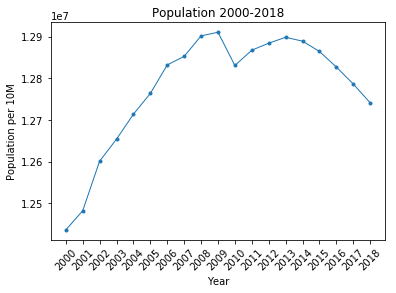

In [13]:
# create line plot for total population

plt.plot(counties["Year"], counties["Total"], marker= '.', linewidth=1, alpha=1.0, label=counties["Total"])

# add title    
plt.title("Population 2000-2018")
plt.xlabel("Year")
plt.ylabel("Population per 10M")
plt.xticks(rotation=45)

# export, save plot
plt.savefig("images/TotalPopulation.png") 
plt.show()


In [14]:
top_five_df = raw_population_df.loc[(raw_population_df["County"] == "Cook") | 
                                (raw_population_df["County"] == "Will") | 
                                (raw_population_df["County"] == "DuPage") | 
                                (raw_population_df["County"] == "Kane") | 
                                (raw_population_df["County"] == "Lake"), :]

top_five_df.set_index("County", inplace=True)
top_five_df.head()


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
County,,,,,,,,,,,,,,,,,,,
Cook,5375600,5350200,5360000,5339100,5321600,5301120,5292290,5278050,5296240,5287960,5194675,5219977,5240505,5254885,5257481,5247662,5228455,5204502,5180493
DuPage,906600,911800,922000,925000,928600,932230,932990,931310,933090,932640,916924,924852,928823,932519,933820,933965,931680,930662,928589
Kane,407400,426200,446400,461900,475700,488730,498640,508830,515990,523730,515269,519211,520885,522935,526028,529330,531463,533156,534216
Lake,648200,661100,677300,684300,694000,704090,711270,714140,717680,720820,703462,701647,702213,704462,704618,704995,704644,703006,700832
Will,508200,536900,565200,594400,622100,641420,666680,679520,688480,695860,677560,680799,682535,683873,685369,686142,688648,691017,692310


In [15]:
top_five_tp = top_five_df.transpose()
top_five_reset = top_five_tp.reset_index()
top_five = top_five_reset.rename(columns={"index":"Year"})
top_five.head()


County,Year,Cook,DuPage,Kane,Lake,Will
0,2000,5375600,906600,407400,648200,508200
1,2001,5350200,911800,426200,661100,536900
2,2002,5360000,922000,446400,677300,565200
3,2003,5339100,925000,461900,684300,594400
4,2004,5321600,928600,475700,694000,622100


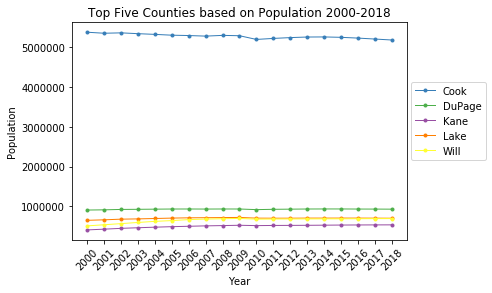

In [22]:
# create line plot for top five
palette = plt.get_cmap('Set1')

# mulitple line plot
num = 0
for column in top_five.drop('Year', axis=1):
    num += 1
    plt.plot(top_five["Year"], top_five[column], marker= '.', color = palette(num), linewidth=1, alpha=1.0, label=column)

# add title    
plt.title("Top Five Counties based on Population 2000-2018")
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation=45)

# add legend
plt.legend(bbox_to_anchor=(1.25, 0.75))
# export, save plot
plt.savefig("images/TopFiveCounties.png", bbox_inches='tight') 
plt.show()


In [18]:
bottom_five_df = raw_population_df.loc[(raw_population_df["County"] == "Gallatin") | 
                                (raw_population_df["County"] == "Scott") | 
                                (raw_population_df["County"] == "Calhoun") | 
                                (raw_population_df["County"] == "Pope") | 
                                (raw_population_df["County"] == "Hardin"), :]
bottom_five_df.set_index("County", inplace=True)
bottom_five_df.head()


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
County,,,,,,,,,,,,,,,,,,,
Calhoun,5100,5100,5100,5200,5200,5270,5270,5220,5140,5100,5089,5048,4985,5008,4925,4858,4866,4841,4802
Gallatin,6400,6300,6200,6200,6200,6090,6110,5990,5910,5620,5589,5490,5391,5387,5280,5222,5157,5069,5058
Hardin,4800,4800,4800,4800,4800,4790,4720,4660,4570,4540,4320,4293,4280,4176,4148,4065,3988,3935,3910
Pope,4400,4300,4300,4300,4300,4160,4160,4150,4360,4240,4470,4494,4454,4453,4371,4287,4179,4194,4212
Scott,5500,5500,5500,5500,5400,5350,5300,5240,5210,5170,5355,5228,5286,5211,5170,5111,5048,4978,4926


In [19]:
bottom_five_tp = bottom_five_df.transpose()
bottom_five_tp
bottom_five_reset = bottom_five_tp.reset_index()
bottom_five = bottom_five_reset.rename(columns={"index":"Year"})
bottom_five.head()


County,Year,Calhoun,Gallatin,Hardin,Pope,Scott
0,2000,5100,6400,4800,4400,5500
1,2001,5100,6300,4800,4300,5500
2,2002,5100,6200,4800,4300,5500
3,2003,5200,6200,4800,4300,5500
4,2004,5200,6200,4800,4300,5400


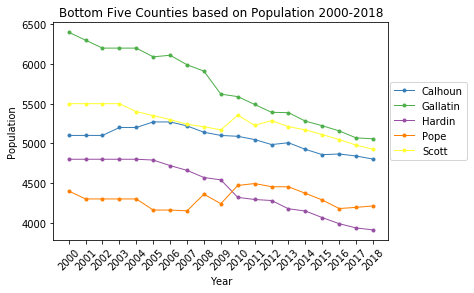

In [23]:
# create line plot for top five
palette = plt.get_cmap('Set1')

# mulitple line plot
num = 0
for column in bottom_five.drop('Year', axis=1):
    num += 1
    plt.plot(bottom_five["Year"], bottom_five[column], marker= '.', color = palette(num), linewidth=1, alpha=1.0, label=column)

# add title    
plt.title("Bottom Five Counties based on Population 2000-2018")
plt.xlabel("Year")
plt.ylabel("Population")
plt.xticks(rotation=45)

# add legend
plt.legend(bbox_to_anchor=(1.25, 0.75))
# export, save plot
plt.savefig("images/BottomFiveCounties.png", bbox_inches='tight') 
plt.show()
